# Design of 3-stage amplifier with miller compensation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols, Eq, solve, simplify, init_printing

# Enable pretty printing in Jupyter
init_printing()

# Define the variables
s, v_in, v_o1, v_ab, v_out, gm_1, gm_6, gm_np, g_1, g_2, g_3, C_1, C_2, C_3, C_13, C_23, beta = symbols('s v_in v_o1 v_ab v_out gm_1 gm_6 gm_np g_1 g_2 g_3 C_1 C_2 C_3 C_c1 C_c23 beta')

# Define the system of equations
node1 = Eq(v_in*gm_1 + v_o1*(g_1+s*C_1) + s*C_13*(v_o1-v_out), 0)
node2 = Eq(-v_o1*gm_6 + v_ab*(g_2+s*C_2) + s*C_23*(v_ab-v_out), 0)
node3 = Eq( v_ab*gm_np + v_out*(g_3+s*C_3) + s*C_23*(v_out-v_ab) + s*C_13*(v_out-v_o1), 0)

# a)

## Open loop transfer function

In [2]:
x = solve((node1, node2, node3), (v_o1, v_ab, v_out))
#x

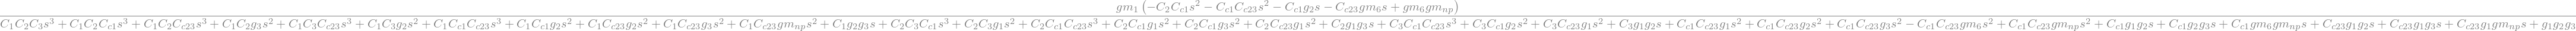

In [3]:
H_s = simplify(x[v_out]/v_in)
H_s


## Close loop transfer function

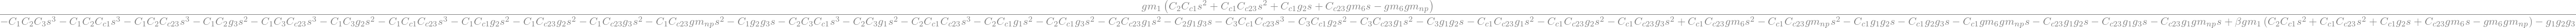

In [4]:
H_cl = simplify(H_s/(1+beta*H_s))
H_cl

# b)

## DC Gain

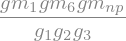

In [5]:
H_0 = H_s.subs(s, 0)
H_0

## Exact zeros

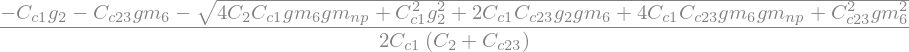

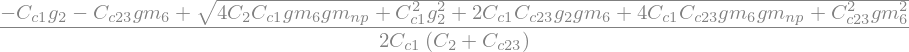

In [6]:
num = H_s.as_numer_denom()[0]
zeros = solve(num, s)
z1, z2 = zeros
display(z1, z2)

## Exact poles

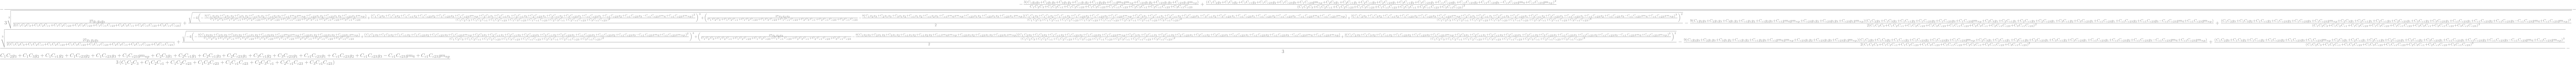

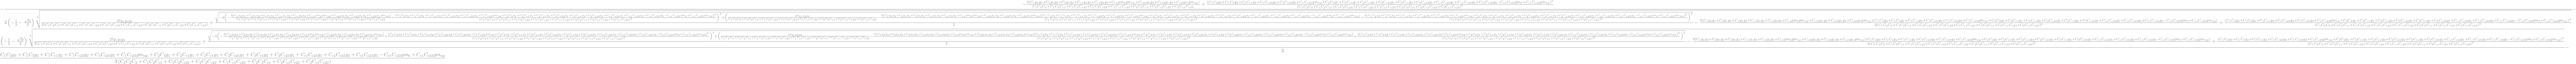

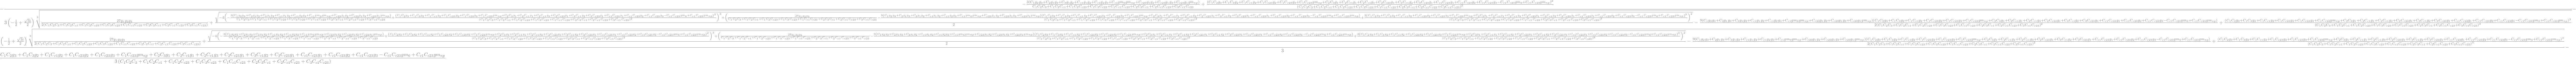

In [7]:
den = H_s.as_numer_denom()[1]
poles = solve(den, s)
p1, p2, p3 = poles
display(p1, p2, p3)

# d)

## Aproximate poles

In [8]:
dd = simplify(den)
a3 = dd.coeff(s,3)
a2 = dd.coeff(s,2)
a1 = dd.coeff(s,1)
a0 = dd.coeff(s,0)
#display(a3,a2,a1,a0)

### considering p1<<p2+p3

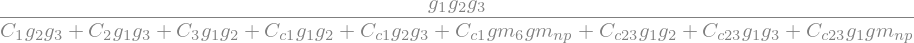

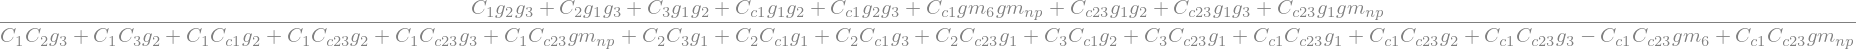

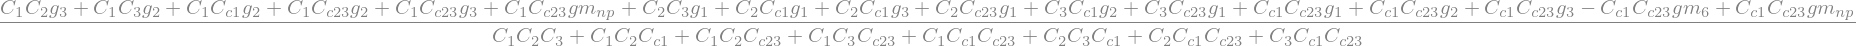

In [9]:
p1ap1 = simplify(a0/a1)
p2ap1 = simplify(a1/a2)
p3ap1 = simplify(a2/a3)
display(p1ap1,p2ap1,p3ap1)

### considering g1<< (cascode has high output impedance -> small output conductance)

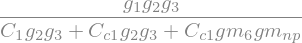

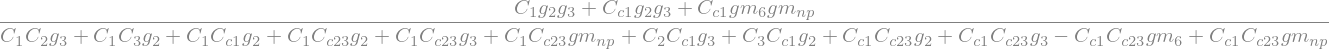

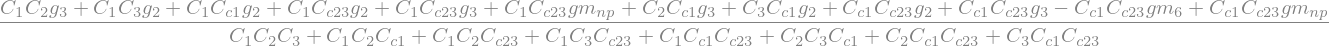

In [10]:
num_p1ap1 = p1ap1.as_numer_denom()[0]
den_p1ap1 = p1ap1.as_numer_denom()[1]

p1ap2 = simplify(num_p1ap1/sp.Limit(den_p1ap1,g_1,0).doit())
p2ap2 = sp.Limit(p2ap1,g_1,0).doit()
p3ap2 = sp.Limit(p3ap1,g_1,0).doit()

display(p1ap2, p2ap2, p3ap2)

### Polo 1 - considering gmnp>>g3

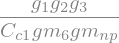

In [11]:
den_p1ap2 = p1ap2.as_numer_denom()[1]

p1ap3 = simplify(num_p1ap1/sp.Limit(den_p1ap2,g_3,0).doit())
display(p1ap3)

### Pole 2 - considering gmnp>>g3, gm6>>g2 and gmnp>>gm6

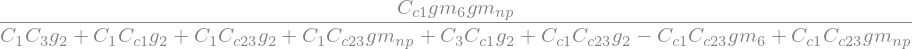

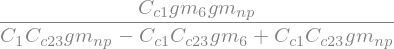

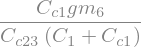

In [12]:
p2ap3 = sp.Limit(p2ap2,g_3,0).doit()
p2ap4 = sp.Limit(p2ap3,g_2,0).doit()

num_p2ap4 = p2ap4.as_numer_denom()[0]
den_p2ap4 = p2ap4.as_numer_denom()[1]
p2ap5 = simplify(num_p2ap4/sp.Limit(den_p2ap4,gm_6,0).doit())
display(p2ap3, p2ap4, p2ap5)

### Pole 3 - considering gmnp>>g3, gm6>>g2 , gmnp>>gm6 and C1=0

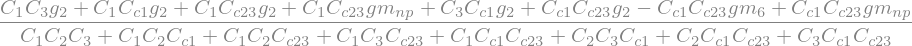

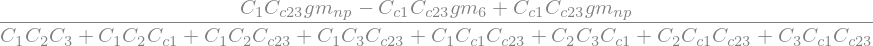

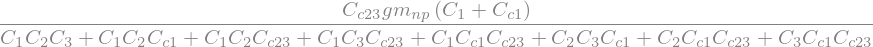

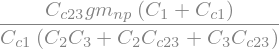

In [13]:
p3ap3 = sp.Limit(p3ap2,g_3,0).doit()
p3ap4 = sp.Limit(p3ap3,g_2,0).doit()
p3ap5 = simplify(sp.Limit(p3ap4,gm_6,0).doit())

num_p3ap5 = p3ap5.as_numer_denom()[0]
den_p3ap5 = p3ap5.as_numer_denom()[1]
p3ap6 = simplify(num_p3ap5/sp.Limit(den_p3ap5,C_1,0).doit())
display(p3ap3, p3ap4, p3ap5, p3ap6)

## Aproximate GBW

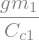

In [14]:
GBW = p1ap3*H_0
display(GBW)

# Replacing gm's, gds's and parasitic capacitances of the transistors

In [15]:
gds_1, gds_2, gds_3, gds_4, gds_5, gds_11, gds_12, gds_13, gds_nb, gds_n, gds_p, gm_3, gm_5, gm_13, gm_nb, Cgs_6, Cdg_6, Cdg_3, Cbd_3, Cgd_5, Cbd_5, Cgd_12, Cbd_12, Cgd_11, Cbd_11, Cgs_nb, Cgd_nb, Cgd_13, Cbd_13, Cgs_nd, Cbd_n, Cbd_p = symbols('gds_1, gds_2, gds_3, gds_4, gds_5, gds_11, gds_12, gds_13, gds_nb, gds_n, gds_p, gm_3, gm_5, gm_13, gm_nb, Cgs_6, Cdg_6, Cdg_3, Cbd_3, Cgd_5, Cbd_5, Cgd_12, Cbd_12, Cgd_11, Cbd_11, Cgs_nb, Cgd_nb, Cgd_13, Cbd_13, Cgs_nd, Cb_dn, Cb_dp')

g1_real = (gds_5/gm_5)*gds_4 + (gds_3/gm_3)*(gds_2+gds_1)
g2_real = gm_nb
g3_real = gds_n + gds_p + 1/16

C1_real = Cgs_6 + Cdg_6 + Cdg_3 + Cbd_3 + Cgd_5 + Cbd_5
C2_real = Cgd_12 + Cbd_12 + Cgd_11 + Cbd_11 + Cgd_13 + Cbd_13 + Cgs_nb + Cgd_nb + Cgs_nd
C3_real = Cbd_n + Cbd_p

### Pole 1

#### considering p1<<p2+p3

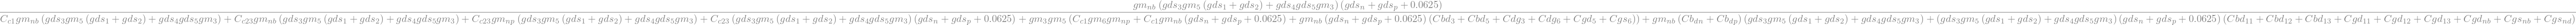

In [16]:
p1ap1_real = simplify(p1ap1.subs({C_1:C1_real, C_2:C2_real, C_3:C3_real, g_1:g1_real, g_2:g2_real, g_3:g3_real}))
display(p1ap1_real)

#### considering g1<< (cascode has high output impedance -> small output conductance)

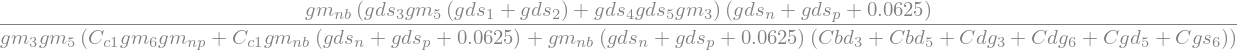

In [17]:
p1ap2_real = simplify(p1ap2.subs({C_1:C1_real, C_2:C2_real, C_3:C3_real, g_1:g1_real, g_2:g2_real, g_3:g3_real}))
display(p1ap2_real)

#### considering gmnp>>g3

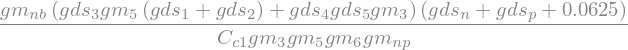

In [18]:
p1ap3_real = simplify(p1ap3.subs({C_1:C1_real, C_2:C2_real, C_3:C3_real, g_1:g1_real, g_2:g2_real, g_3:g3_real}))
display(p1ap3_real)

### Pole 2

#### considering g1<< (cascode has high output impedance -> small output conductance)

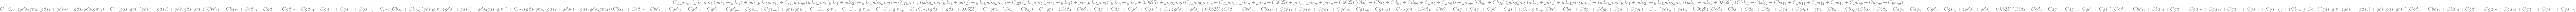

In [19]:
p2ap1_real = simplify(p2ap1.subs({C_1:C1_real, C_2:C2_real, C_3:C3_real, g_1:g1_real, g_2:g2_real, g_3:g3_real}))
display(p2ap1_real)

#### considering gmnp>>g3, gm6>>g2 and gmnp>>gm6

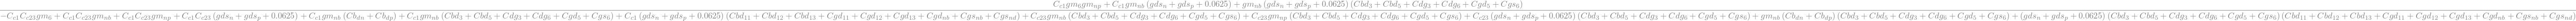

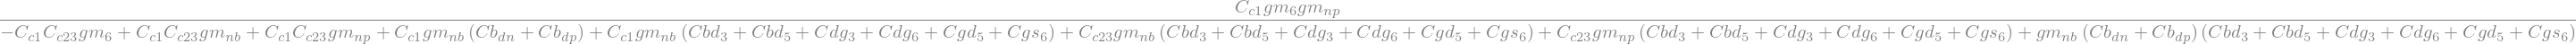

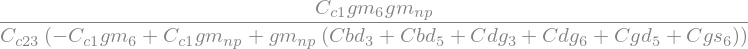

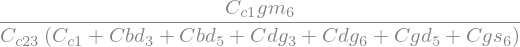

In [20]:
p2ap2_real = simplify(p2ap2.subs({C_1:C1_real, C_2:C2_real, C_3:C3_real, g_1:g1_real, g_2:g2_real, g_3:g3_real}))
p2ap3_real = simplify(p2ap3.subs({C_1:C1_real, C_2:C2_real, C_3:C3_real, g_1:g1_real, g_2:g2_real, g_3:g3_real}))
p2ap4_real = simplify(p2ap4.subs({C_1:C1_real, C_2:C2_real, C_3:C3_real, g_1:g1_real, g_2:g2_real, g_3:g3_real}))
p2ap5_real = simplify(p2ap5.subs({C_1:C1_real, C_2:C2_real, C_3:C3_real, g_1:g1_real, g_2:g2_real, g_3:g3_real}))
display(p2ap2_real, p2ap3_real, p2ap4_real, p2ap5_real)

### Pole 3

#### considering g1<< (cascode has high output impedance -> small output conductance)

In [ ]:
p3ap1_real = simplify(p3ap1.subs({C_1:C1_real, C_2:C2_real, C_3:C3_real, g_1:g1_real, g_2:g2_real, g_3:g3_real}))
display(p3ap1_real)

#### considering gmnp>>g3, gm6>>g2 , gmnp>>gm6 and C1=0

In [ ]:
p3ap2_real = simplify(p3ap2.subs({C_1:C1_real, C_2:C2_real, C_3:C3_real, g_1:g1_real, g_2:g2_real, g_3:g3_real}))
p3ap3_real = simplify(p3ap3.subs({C_1:C1_real, C_2:C2_real, C_3:C3_real, g_1:g1_real, g_2:g2_real, g_3:g3_real}))
p3ap4_real = simplify(p3ap4.subs({C_1:C1_real, C_2:C2_real, C_3:C3_real, g_1:g1_real, g_2:g2_real, g_3:g3_real}))
p3ap5_real = simplify(p3ap5.subs({C_1:C1_real, C_2:C2_real, C_3:C3_real, g_1:g1_real, g_2:g2_real, g_3:g3_real}))
p3ap6_real = simplify(p3ap6.subs({C_1:C1_real, C_2:C2_real, C_3:C3_real, g_1:g1_real, g_2:g2_real, g_3:g3_real}))
display(p3ap2_real, p3ap3_real, p3ap4_real, p3ap5_real, p3ap6_real)

### DC Gain

In [ ]:
H_0_real = simplify(H_0.subs({C_1:C1_real, C_2:C2_real, C_3:C3_real, g_1:g1_real, g_2:g2_real, g_3:g3_real}))
display(H_0_real)

### GBW

In [ ]:
GBW_real = simplify(GBW.subs({C_1:C1_real, C_2:C2_real, C_3:C3_real, g_1:g1_real, g_2:g2_real, g_3:g3_real}))
display(GBW_real)